In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [88]:
soccer_data = pd.read_csv("C:/Users/ozaka/Downloads/passes.csv", delimiter=";")

In [90]:
print(soccer_data.columns)

Index(['game_id', 'passing_quote', 'winner'], dtype='object')


In [91]:
soccer_data.head()

,game_id,passing_quote,winner
0,11,72.0,No
1,11,91.0,Yes
2,12,82.0,Yes
3,12,86.0,No
4,13,82.0,Yes


In [92]:
soccer_data = soccer_data.dropna()

In [93]:
soccer_data['winner'] = soccer_data['winner'].map({'Yes': 1, 'No': 0})

In [94]:
soccer_data.head()

,game_id,passing_quote,winner
0,11,72.0,0
1,11,91.0,1
2,12,82.0,1
3,12,86.0,0
4,13,82.0,1


In [95]:
# Summary statistics
summary_stats = soccer_data.groupby('winner')['passing_quote'].describe()

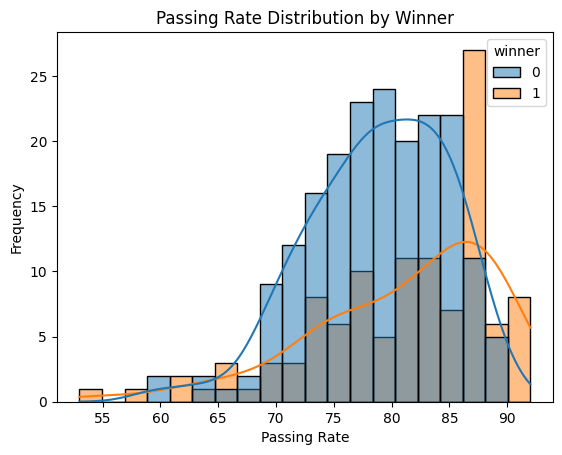

In [96]:
# Distribution visualization
sns.histplot(data=soccer_data, x='passing_quote', hue='winner', kde=True, bins=20)
plt.title('Passing Rate Distribution by Winner')
plt.xlabel('Passing Rate')
plt.ylabel('Frequency')
plt.show()

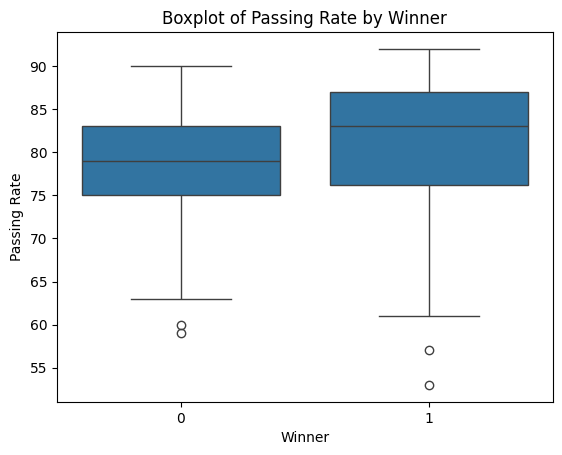

In [97]:
# Boxplot
sns.boxplot(data=soccer_data, x='winner', y='passing_quote')
plt.title('Boxplot of Passing Rate by Winner')
plt.xlabel('Winner')
plt.ylabel('Passing Rate')
plt.show()

In [98]:
# Correlation analysis
correlation = soccer_data['passing_quote'].corr(soccer_data['winner'])
print("Correlation between passing rate and winning probabilities:", correlation)

Correlation between passing rate and winning probabilities: 0.15584525782767325


In [99]:
# Hypothesis testing
# Winner vs. Loser Passing Rate
winner_passing_rate = soccer_data[soccer_data['winner'] == 1]['passing_quote']
loser_passing_rate = soccer_data[soccer_data['winner'] == 0]['passing_quote']
t_stat, p_value = ttest_ind(winner_passing_rate, loser_passing_rate)
print("Winner vs. Loser Passing Rate:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

Winner vs. Loser Passing Rate:
t-statistic: 2.741802595638678
p-value: 0.006474765088259819


In [100]:
# Difference in Passing Rate
draw_passing_rate = soccer_data[soccer_data['winner'] == 0]['passing_quote']  # Assuming draw means no winner
t_stat_diff, p_value_diff = ttest_ind(winner_passing_rate, draw_passing_rate)
print("\nDifference in Passing Rate (Winner vs. Draw):")
print("t-statistic:", t_stat_diff)
print("p-value:", p_value_diff)


Difference in Passing Rate (Winner vs. Draw):
t-statistic: 2.741802595638678
p-value: 0.006474765088259819
